In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
Q_SP = pd.read_excel('../Invoer/Afvoeren/Non_exceedance.xlsx', index_col=0)

In [114]:
# Q_turbines = []
# for Q in Q_SP.index:
#     if Q < 100:
#         Q_turbines.append(0.0)
#     elif (Q >= 100) & (Q <= 300):
#         Q_turbines.append((Q - 100)*0.5)
#     else:
#         Q_turbines.append(100.0)
# Q_turbines = np.array(Q_turbines)

In [129]:
Q_turbines = []
for Q in Q_SP.index:
    if Q <= 200:
        Q_turbines.append(0.0)
    else:
        Q_turbines.append(45.0)
Q_turbines = np.array(Q_turbines)

In [130]:
rho = 1000
g = 9.81

In [131]:
P = lambda Q: eta * rho * g * dH * Q / 1000 # kW

In [132]:
dH = 11.35
eta = 0.8

P_turbines = P(Q_turbines)  # kW

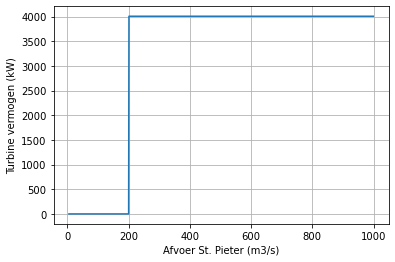

In [133]:
plt.plot(Q_SP.index, P_turbines)

plt.xlabel('Afvoer St. Pieter (m3/s)')
plt.ylabel('Turbine vermogen (kW)')
plt.grid()

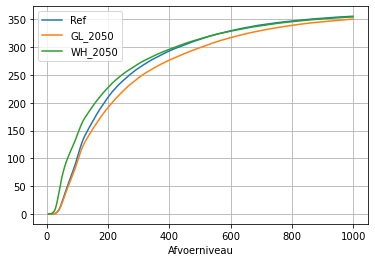

In [143]:
(Q_SP[['Ref', 'GL_2050', 'WH_2050']] * 365).rolling(20, min_periods=0).mean().plot()
plt.grid()

In [146]:
Q_SP['GL_2050'].diff().groupby(pd.cut(Q_SP['GL_2050'].index, [0, 100, 200, 99999])).sum() * 365

(0, 100]        112.260504
(100, 200]       86.070344
(200, 99999]    152.817159
Name: GL_2050, dtype: float64

<AxesSubplot:>

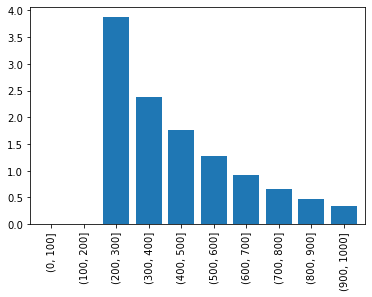

In [151]:
X = (Q_SP['WH_2050'].diff()* P_turbines).cumsum() # kW per afvoerniveau als fractie van tijd
E = X * 24 * 365 # kWh per jaar
E = E / 1e6 # GWh
E.diff().groupby(pd.cut(E.index, np.arange(0, 1001, 100))).sum().plot.bar(width=0.8)

In [152]:
E_tot = E.iloc[-1]  # GWh
E_tot

11.683805573705673

In [154]:
# Stroomsnelheid in JK
Q = 60
W = 50
d = 3.5 * 1.4 + 0.5
u = Q / (W * d)
u

0.2222222222222222

In [156]:
# Energieopbrenst
12 * 1e6 * 0.04425

531000.0